### Importación de datos



In [7]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [9]:

todas_las_ventas = pd.concat([tienda, tienda2, tienda3, tienda4], ignore_index=True)
print(f"Total de registros combinados: {len(todas_las_ventas)}")
todas_las_ventas.head()

Total de registros combinados: 9435


,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


In [10]:
# 1. Calculamos la facturación individual por producto (Precio + Envío)
todas_las_ventas['Facturacion_Producto'] = todas_las_ventas['Precio'] + todas_las_ventas['Costo de envío']

# 2. Calculamos el gran total de facturación
facturacion_total = todas_las_ventas['Facturacion_Producto'].sum()

print(f"La facturación total combinada es: ${facturacion_total:,.2f}")

# 3. Bonus: Ver cuánto facturó cada tienda por separado
reporte_tiendas = todas_las_ventas.groupby('Lugar de Compra')['Facturacion_Producto'].sum()
print("\nFacturación por ciudad/tienda:")
print(reporte_tiendas)

La facturación total combinada es: $4,638,316,200.00

Facturación por ciudad/tienda:
Lugar de Compra
Armenia          1.288320e+07
Barranquilla     1.390751e+08
Bogotá           1.911588e+09
Bucaramanga      9.542230e+07
Cali             5.334400e+08
Cartagena        1.078552e+08
Cúcuta           1.046882e+08
Inírida          8.515700e+06
Leticia          7.074500e+07
Manizales        2.039080e+07
Medellín         1.155172e+09
Neiva            2.200640e+07
Pasto            5.162760e+07
Pereira          2.379276e+08
Riohacha         7.781250e+07
Santa Marta      5.593210e+07
Soacha           1.297830e+07
Valledupar       6.194600e+06
Villavicencio    1.406150e+07
Name: Facturacion_Producto, dtype: float64


# 2. Ventas por categoría

In [12]:
# Agrupamos por categoría y sumamos la facturación de cada una
ventas_categoria = todas_las_ventas.groupby('Categoría del Producto')['Facturacion_Producto'].sum().sort_values(ascending=False)

print("Resumen de ventas por categoría:")
print(ventas_categoria)

# Si quieres ver cuál es la categoría líder de forma clara:
categoria_top = ventas_categoria.idxmax()
total_top = ventas_categoria.max()

print(f"\n¡La categoría más exitosa es {categoria_top} con ${total_top:,.2f}!")

Resumen de ventas por categoría:
Categoría del Producto
Electrónicos               1.749039e+09
Electrodomésticos          1.395147e+09
Muebles                    7.981114e+08
Instrumentos musicales     3.672769e+08
Deportes y diversión       1.506693e+08
Juguetes                   7.762570e+07
Artículos para el hogar    6.069090e+07
Libros                     3.975600e+07
Name: Facturacion_Producto, dtype: float64

¡La categoría más exitosa es Electrónicos con $1,749,038,600.00!


# 3. Calificación promedio de la tienda


In [13]:
# Calculamos el promedio de la columna 'Calificación' agrupado por tienda
calificacion_promedio = todas_las_ventas.groupby('Lugar de Compra')['Calificación'].mean().sort_values(ascending=False)

print("Calificación promedio por ciudad/tienda:")
print(calificacion_promedio)

# Sacamos el promedio global de todas las tiendas
promedio_global = todas_las_ventas['Calificación'].mean()
print(f"\nEl promedio de satisfacción global es de: {promedio_global:.2f} estrellas")

Calificación promedio por ciudad/tienda:
Lugar de Compra
Pasto            4.148936
Bogotá           4.113619
Valledupar       4.071429
Cali             4.046673
Cartagena        4.020661
Pereira          4.013540
Bucaramanga      3.977901
Cúcuta           3.940860
Medellín         3.926534
Leticia          3.922535
Riohacha         3.895706
Soacha           3.894737
Villavicencio    3.827586
Barranquilla     3.803226
Neiva            3.800000
Inírida          3.642857
Manizales        3.634146
Santa Marta      3.596026
Armenia          3.464286
Name: Calificación, dtype: float64

El promedio de satisfacción global es de: 4.01 estrellas


# 4. Productos más y menos vendidos

--- Los 3 productos más vendidos por ciudad ---
    Lugar de Compra                     Producto  Cantidad
2           Armenia      Bloques de construcción         4
18          Armenia                  Tablet ABXY         3
4           Armenia                   Cubertería         2
30     Barranquilla                     Cama box        13
53     Barranquilla                   Microondas        12
20     Barranquilla            Ajedrez de madera        10
83           Bogotá    Carrito de control remoto       104
121          Bogotá                 Vaso térmico        98
80           Bogotá      Bloques de construcción        89
148     Bucaramanga                Juego de mesa        10
149     Bucaramanga                Kit de bancas         8
154     Bucaramanga                Mesa de noche         7
204            Cali                Mesa de noche        29
217            Cali                     Smart TV        29
177            Cali          Balón de baloncesto        28
239     

/tmp/ipython-input-203268312.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_global.values, y=top_10_global.index, palette='viridis')


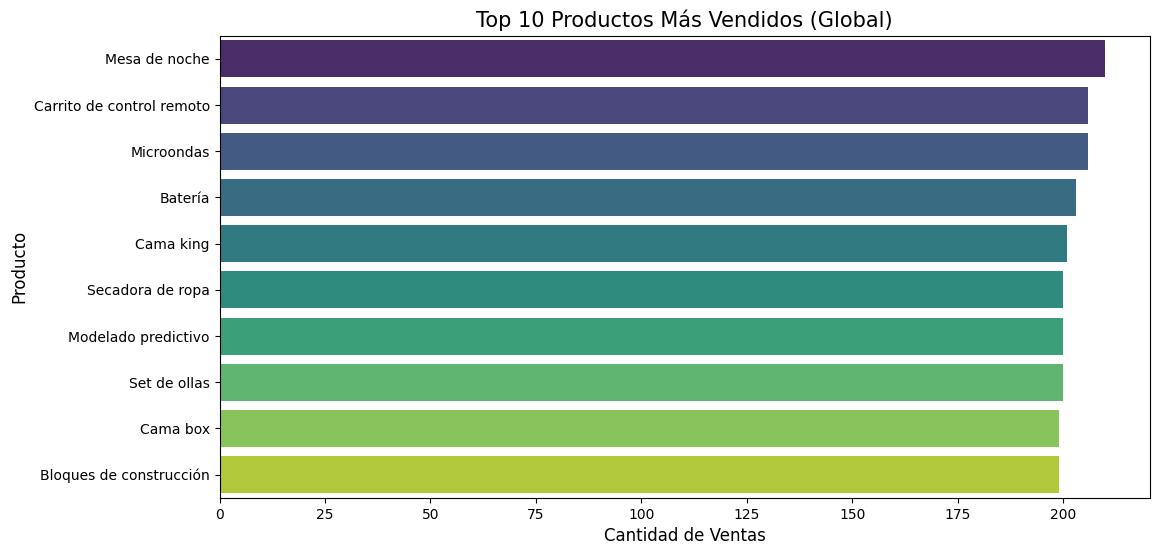

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Identificar Top 3 productos más vendidos por cada ciudad/tienda
top_por_tienda = todas_las_ventas.groupby(['Lugar de Compra', 'Producto']).size().reset_index(name='Cantidad')
top_por_tienda = top_por_tienda.sort_values(['Lugar de Compra', 'Cantidad'], ascending=[True, False])

print("--- Los 3 productos más vendidos por ciudad ---")
print(top_por_tienda.groupby('Lugar de Compra').head(3))

print("\n--- Los 3 productos menos vendidos por ciudad ---")
print(top_por_tienda.groupby('Lugar de Compra').tail(3))

# 2. Visualización: Gráfica de los 10 productos más vendidos en general
plt.figure(figsize=(12, 6))
top_10_global = todas_las_ventas['Producto'].value_counts().head(10)
sns.barplot(x=top_10_global.values, y=top_10_global.index, palette='viridis')

plt.title('Top 10 Productos Más Vendidos (Global)', fontsize=15)
plt.xlabel('Cantidad de Ventas', fontsize=12)
plt.ylabel('Producto', fontsize=12)
plt.show()

# 5. Envío promedio por tienda